Generative Pretrained Transformers  

Self Attention. Co smakowało dobrze, pizza czy piekarnik?  
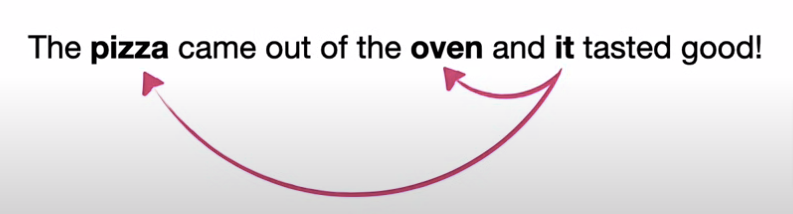  
Mechanizm potrafi obliczać podobieństwo tych słów  
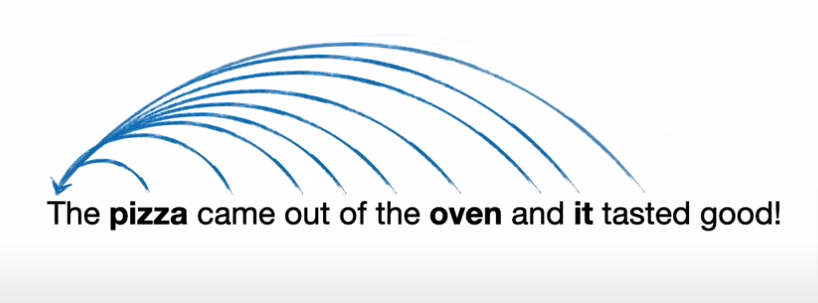  
Źródło:  https://www.youtube.com/watch?v=zxQyTK8quyY

In [ ]:
from langchain.llms.openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
llm = OpenAI(temperature=0.5, model='gpt-3.5-turbo-instruct')

name = llm("Mam psa i chcę wymyśleć mu ładne imię. Zaproponuj mi pięć fajnych imion dla zwierzaka.")

print(name)

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

promp_template_name = PromptTemplate(
    input_variables=['animal_type', 'pet_color'],
    template="Mam {animal_type} i chcę wymyśleć mu ładne imię. Jego sierść ma kolor {pet_color}. Zaproponuj mi pięć fajnych imion dla zwierzaka."
)

name_chain = LLMChain(llm=llm, prompt=promp_template_name)
response = name_chain({ 'animal_type': 'małpa', 'pet_color': 'biała' })
print(response)

In [ ]:
from langchain.agents import load_tools, initialize_agent, AgentType

tools = load_tools(["wikipedia"], llm=llm)

agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

result = agent.run("What were the match scores of Poland at the FIFA World Cup 2022?")

print(result)